# 1.0  INTRODUCTION :

###    "Unhealthy behaviours place a major burden on Canadian life expectancies" said lead author Dr. Doug Manuel, senior scientist at The Ottawa Hospital and professor at The University of Ottawa, and a senior core scientist at the Institute for Clinical Evaluative Sciences (ICES).

##  Life Expectancy is dependes upon several controllable habbits such as - 
###      - Smoking 
###      - Alcohol Consumption
###      - Physical Inactivity
###      - Unhealthy Eating and Stress  

# 2.0  PROBLEM DEFINITION:


### Milestone 1 : To Develop Inferential Stats to Support Following Questionaries

1. Does various predicting factors which has been chosen initially really affect Life expectancy? What are the predicting variables actually affecting life expectancy?

2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

3. How do Infant and Adult mortality rates affect life expectancy?

4. Does Life Expectancy has a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc?

5. What is the impact of schooling on the lifespan of humans?

6. Does Life Expectancy have a positive or negative relationship with drinking alcohol?

7. Do densely populated countries tend to have lower life expectancy?

8. What is the impact of Immunization coverage on Life Expectancy?


### Milestone 2 : To Developed A Machine Learning Model In Order To Predict Life Expectancy 

### FEATURE INFORMATION 
1) Country
2) Year
3) Status – Developed or Developing status
4) Life expectancy – Life Expectancy in age
5) Adult Mortality – Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6) infant deaths – Number of Infant Deaths per 1000 population
7) Alcohol – Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8) percentage expenditure – Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9) Hepatitis B – Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10) Measles – Measles – number of reported cases per 1000 population
11) BMI – Average Body Mass Index of entire population
12) under-five deaths – Number of under-five deaths per 1000 population
13) Polio – Polio (Pol3) immunization coverage among 1-year-olds (%)
14) Total expenditure – General government expenditure on health as a percentage of total government expenditure (%)
15) Diphtheria – Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16) HIV/AIDS – Deaths per 1 000 live births HIV/AIDS (0-4 years)
17) GDP – Gross Domestic Product per capita (in USD)
18) Population – Population of the country
19) thinness 1-19 years – Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
20) thinness 5-9 years – Prevalence of thinness among children for Age 5 to 9(%)
21) Income composition – Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22) Schooling – Number of years of Schooling(years)

# 3.0 SETTING THE HYPOTHESIS

### --- INSTALLING REQUIRED PACKAGES 

In [1]:
!pip install klib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install -U dataprep

Defaulting to user installation because normal site-packages is not writeable


### --- IMPORT PACKAGES

In [3]:
# Import Python Neccessories Libraries
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
import math
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')
# Import EDA library
import klib

In [4]:
# Import Data using Pandas function

df = pd.read_csv('Life Expectancy Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [5]:
# Checking the total Rows and Columns in the Dataset

df.shape

(2938, 22)

In [6]:
# Listing the presented columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

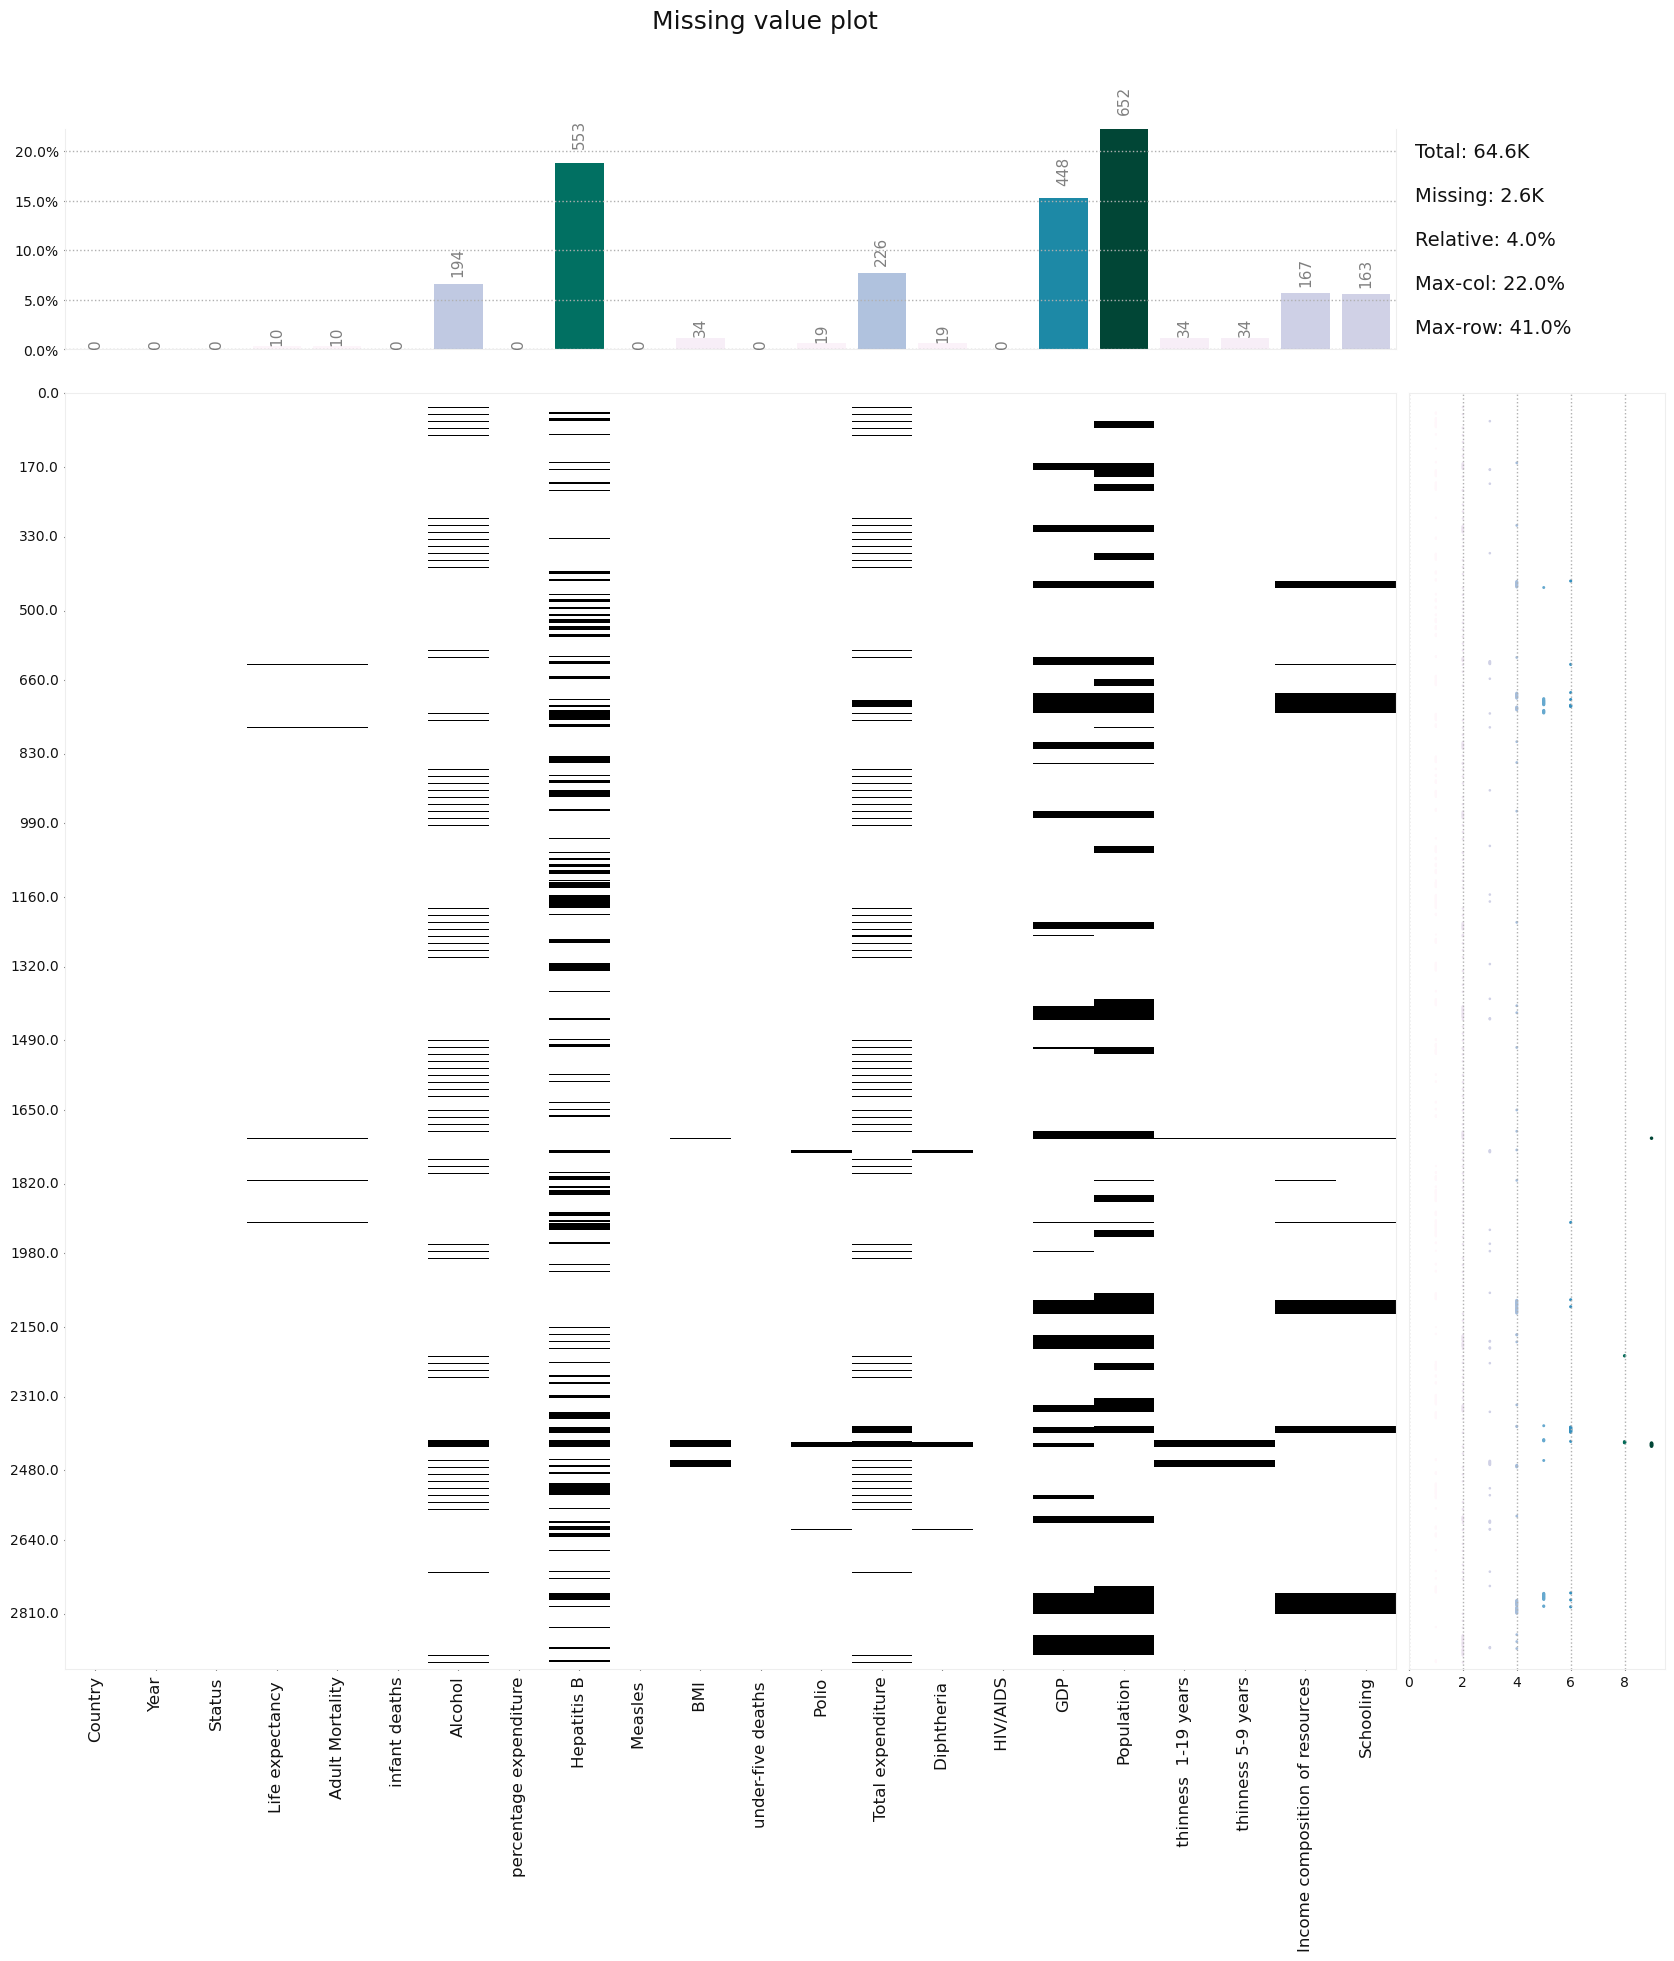

In [7]:
# Checking Missing Data Information
klib.missingval_plot(df);

In [8]:
# Dropping the Null Values in the Dataset
ndf = df.dropna()
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [9]:
# Rearranging and Cleanining the Feature Column Names
ncols = ['Country', 'Year', 'Status', 'Adult_Mortality',
       'Infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'underfive_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'thinness_1-19_years', ' thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling','Life_expectancy']
ndf.columns = ncols
ndf.head()

Country  Year      Status  Adult_Mortality  Infant_deaths  Alcohol  \
0  Afghanistan  2015  Developing             65.0          263.0       62   
1  Afghanistan  2014  Developing             59.9          271.0       64   
2  Afghanistan  2013  Developing             59.9          268.0       66   
3  Afghanistan  2012  Developing             59.5          272.0       69   
4  Afghanistan  2011  Developing             59.2          275.0       71   

   percentage_expenditure  Hepatitis_B  Measles   BMI  ...  Total_expenditure  \
0                    0.01    71.279624     65.0  1154  ...                6.0   
1                    0.01    73.523582     62.0   492  ...               58.0   
2                    0.01    73.219243     64.0   430  ...               62.0   
3                    0.01    78.184215     67.0  2787  ...               67.0   
4                    0.01     7.097109     68.0  3013  ...               68.0   

   Diphtheria  HIV_AIDS  GDP  Population  thinness_1-19_years  \
0        8.16      65.0  0.1  584.259210           33736494.0   
1        8.18      62.0  0.1  612.696514             327582.0   
2        8.13      64.0  0.1  631.744976           31731688.0   
3        8.52      67.0  0.1  669.959000            3696958.0   
4        7.87      68.0  0.1   63.537231            2978599.0   

    thinness_5-9_years  Income_composition_of_resources  Schooling  \
0                 17.2                             17.3      0.479   
1                 17.5                             17.5      0.476   
2                 17.7                             17.7      0.470   
3                 17.9                             18.0      0.463   
4                 18.2                             18.2      0.454   

   Life_expectancy  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5  

[5 rows x 22 columns]

In [10]:
ndf.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'underfive_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       ' thinness_5-9_years', 'Income_composition_of_resources', 'Schooling',
       'Life_expectancy'],
      dtype='object')

In [11]:
cols = ndf[['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'underfive_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       ' thinness_5-9_years', 'Income_composition_of_resources', 'Schooling',
       'Life_expectancy']]

for i in cols:
    print(i)
    print('-------------------')
    print(cols[i].nunique())
    print('-------------------')

Country
-------------------
133
-------------------
Year
-------------------
16
-------------------
Status
-------------------
2
-------------------
Adult_Mortality
-------------------
320
-------------------
Infant_deaths
-------------------
369
-------------------
Alcohol
-------------------
165
-------------------
percentage_expenditure
-------------------
833
-------------------
Hepatitis_B
-------------------
1645
-------------------
Measles
-------------------
83
-------------------
BMI
-------------------
603
-------------------
underfive_deaths
-------------------
538
-------------------
Polio
-------------------
199
-------------------
Total_expenditure
-------------------
68
-------------------
Diphtheria
-------------------
669
-------------------
HIV_AIDS
-------------------
66
-------------------
GDP
-------------------
167
-------------------
Population
-------------------
1649
-------------------
thinness_1-19_years
-------------------
1647
-------------------
 thinness_

In [12]:
for i in cols:
    print(i)
    print('-------------------')
    print(cols[i].value_counts())
    print('-------------------')

Country
-------------------
Afghanistan          16
Albania              16
Kiribati             15
Mexico               15
Mauritius            15
                     ..
Ireland               5
Sweden                4
Netherlands           4
Haiti                 2
Equatorial Guinea     1
Name: Country, Length: 133, dtype: int64
-------------------
Year
-------------------
2014    131
2013    130
2011    130
2012    129
2010    128
2009    126
2008    123
2007    120
2006    114
2005    110
2004    103
2003     95
2002     81
2001     66
2000     61
2015      2
Name: Year, dtype: int64
-------------------
Status
-------------------
Developing    1407
Developed      242
Name: Status, dtype: int64
-------------------
Adult_Mortality
-------------------
73.0    36
75.0    20
73.9    19
78.0    17
74.5    17
        ..
55.8     1
58.7     1
49.5     1
82.7     1
44.3     1
Name: Adult_Mortality, Length: 320, dtype: int64
-------------------
Infant_deaths
-------------------
14.0     18
1

### -- DATASET FOR DEVELOPED COUNTRIES

In [13]:
ndeveloped_country_data = ndf[ndf['Status']=='Developed']
ndeveloped_country_data

Country  Year     Status  Adult_Mortality  Infant_deaths  Alcohol  \
113   Australia  2014  Developed             82.7            6.0        1   
114   Australia  2013  Developed             82.5           61.0        1   
115   Australia  2012  Developed             82.3           61.0        1   
116   Australia  2011  Developed             82.0           63.0        1   
117   Australia  2010  Developed             81.9           64.0        1   
...         ...   ...        ...              ...            ...      ...   
2440      Spain  2000  Developed             79.1           86.0        2   
2506     Sweden  2014  Developed             82.3           54.0        0   
2507     Sweden  2013  Developed             81.9           57.0        0   
2508     Sweden  2012  Developed             81.7           57.0        0   
2509     Sweden  2011  Developed             81.7           58.0        0   

      percentage_expenditure   Hepatitis_B  Measles  BMI  ...  \
113                     9.71  10769.363050     91.0  340  ...   
114                     9.87  11734.853810     91.0  158  ...   
115                    10.03  11714.998580     91.0  199  ...   
116                    10.30  10986.265270     92.0  190  ...   
117                    10.52   8875.786493     92.0   70  ...   
...                      ...           ...      ...  ...  ...   
2440                   11.12   1934.398154     77.0  152  ...   
2506                    7.30   1142.212403     67.0   26  ...   
2507                    7.30   1212.666327     67.0   51  ...   
2508                    7.40  10947.023270     53.0   30  ...   
2509                    7.40  11477.667100     42.0   26  ...   

      Total_expenditure  Diphtheria  HIV_AIDS  GDP   Population  \
113                92.0        9.42      92.0  0.1  62214.69120   
114                91.0        9.36      91.0  0.1  67792.33860   
115                92.0        9.36      92.0  0.1  67677.63477   
116                92.0        9.20      92.0  0.1  62245.12900   
117                92.0        9.20      92.0  0.1  51874.84800   
...                 ...         ...       ...  ...          ...   
2440               95.0        7.21      95.0  0.1  14676.76900   
2506               98.0       11.93      98.0  0.1   5918.19898   
2507               98.0       11.97      98.0  0.1   6283.24522   
2508               98.0       11.80      98.0  0.1  57134.77700   
2509               98.0       11.70      98.0  0.1  59593.28711   

      thinness_1-19_years   thinness_5-9_years  \
113             2346694.0                  0.6   
114            23117353.0                  0.6   
115            22728254.0                  0.6   
116              223424.0                  0.6   
117              223175.0                  0.7   
...                   ...                  ...   
2440            4567864.0                  0.6   
2506             969611.0                  1.5   
2507              96379.0                  1.4   
2508            9519374.0                  1.4   
2509            9449213.0                  1.4   

      Income_composition_of_resources  Schooling  Life_expectancy  
113                               0.6      0.936             20.4  
114                               0.6      0.933             20.3  
115                               0.6      0.930             20.1  
116                               0.6      0.927             19.8  
117                               0.6      0.927             19.5  
...                               ...        ...              ...  
2440                              0.5      0.820             15.7  
2506                              1.3      0.906             15.8  
2507                              1.3      0.904             15.8  
2508                              1.3      0.903             15.8  
2509                              1.3      0.901             16.0  

[242 rows x 22 columns]

In [14]:
# ndf.to_csv('Developed Countries Dataset')

### -- DATASET FOR DEVELOPING COUNTRIES

In [15]:
ndeveloping_country_data = ndf[ndf['Status']=='Developing']
ndeveloping_country_data

Country  Year      Status  Adult_Mortality  Infant_deaths  Alcohol  \
0     Afghanistan  2015  Developing             65.0          263.0       62   
1     Afghanistan  2014  Developing             59.9          271.0       64   
2     Afghanistan  2013  Developing             59.9          268.0       66   
3     Afghanistan  2012  Developing             59.5          272.0       69   
4     Afghanistan  2011  Developing             59.2          275.0       71   
...           ...   ...         ...              ...            ...      ...   
2933     Zimbabwe  2004  Developing             44.3          723.0       27   
2934     Zimbabwe  2003  Developing             44.5          715.0       26   
2935     Zimbabwe  2002  Developing             44.8           73.0       25   
2936     Zimbabwe  2001  Developing             45.3          686.0       25   
2937     Zimbabwe  2000  Developing             46.0          665.0       24   

      percentage_expenditure  Hepatitis_B  Measles   BMI  ...  \
0                       0.01    71.279624     65.0  1154  ...   
1                       0.01    73.523582     62.0   492  ...   
2                       0.01    73.219243     64.0   430  ...   
3                       0.01    78.184215     67.0  2787  ...   
4                       0.01     7.097109     68.0  3013  ...   
...                      ...          ...      ...   ...  ...   
2933                    4.36     0.000000     68.0    31  ...   
2934                    4.06     0.000000      7.0   998  ...   
2935                    4.43     0.000000     73.0   304  ...   
2936                    1.72     0.000000     76.0   529  ...   
2937                    1.68     0.000000     79.0  1483  ...   

      Total_expenditure  Diphtheria  HIV_AIDS   GDP  Population  \
0                   6.0        8.16      65.0   0.1  584.259210   
1                  58.0        8.18      62.0   0.1  612.696514   
2                  62.0        8.13      64.0   0.1  631.744976   
3                  67.0        8.52      67.0   0.1  669.959000   
4                  68.0        7.87      68.0   0.1   63.537231   
...                 ...         ...       ...   ...         ...   
2933               67.0        7.13      65.0  33.6  454.366654   
2934                7.0        6.52      68.0  36.7  453.351155   
2935               73.0        6.53      71.0  39.8   57.348340   
2936               76.0        6.16      75.0  42.1  548.587312   
2937               78.0        7.10      78.0  43.5  547.358878   

      thinness_1-19_years   thinness_5-9_years  \
0              33736494.0                 17.2   
1                327582.0                 17.5   
2              31731688.0                 17.7   
3               3696958.0                 17.9   
4               2978599.0                 18.2   
...                   ...                  ...   
2933           12777511.0                  9.4   
2934           12633897.0                  9.8   
2935             125525.0                  1.2   
2936           12366165.0                  1.6   
2937           12222251.0                 11.0   

      Income_composition_of_resources  Schooling  Life_expectancy  
0                                17.3      0.479             10.1  
1                                17.5      0.476             10.0  
2                                17.7      0.470              9.9  
3                                18.0      0.463              9.8  
4                                18.2      0.454              9.5  
...                               ...        ...              ...  
2933                              9.4      0.407              9.2  
2934                              9.9      0.418              9.5  
2935                              1.3      0.427             10.0  
2936                              1.7      0.427              9.8  
2937                             11.2      0.434              9.8  

[1407 rows x 22 columns]

In [16]:
# ndf.to_csv('Developing Countries Dataset')

### -- DATA VISUALIZATION

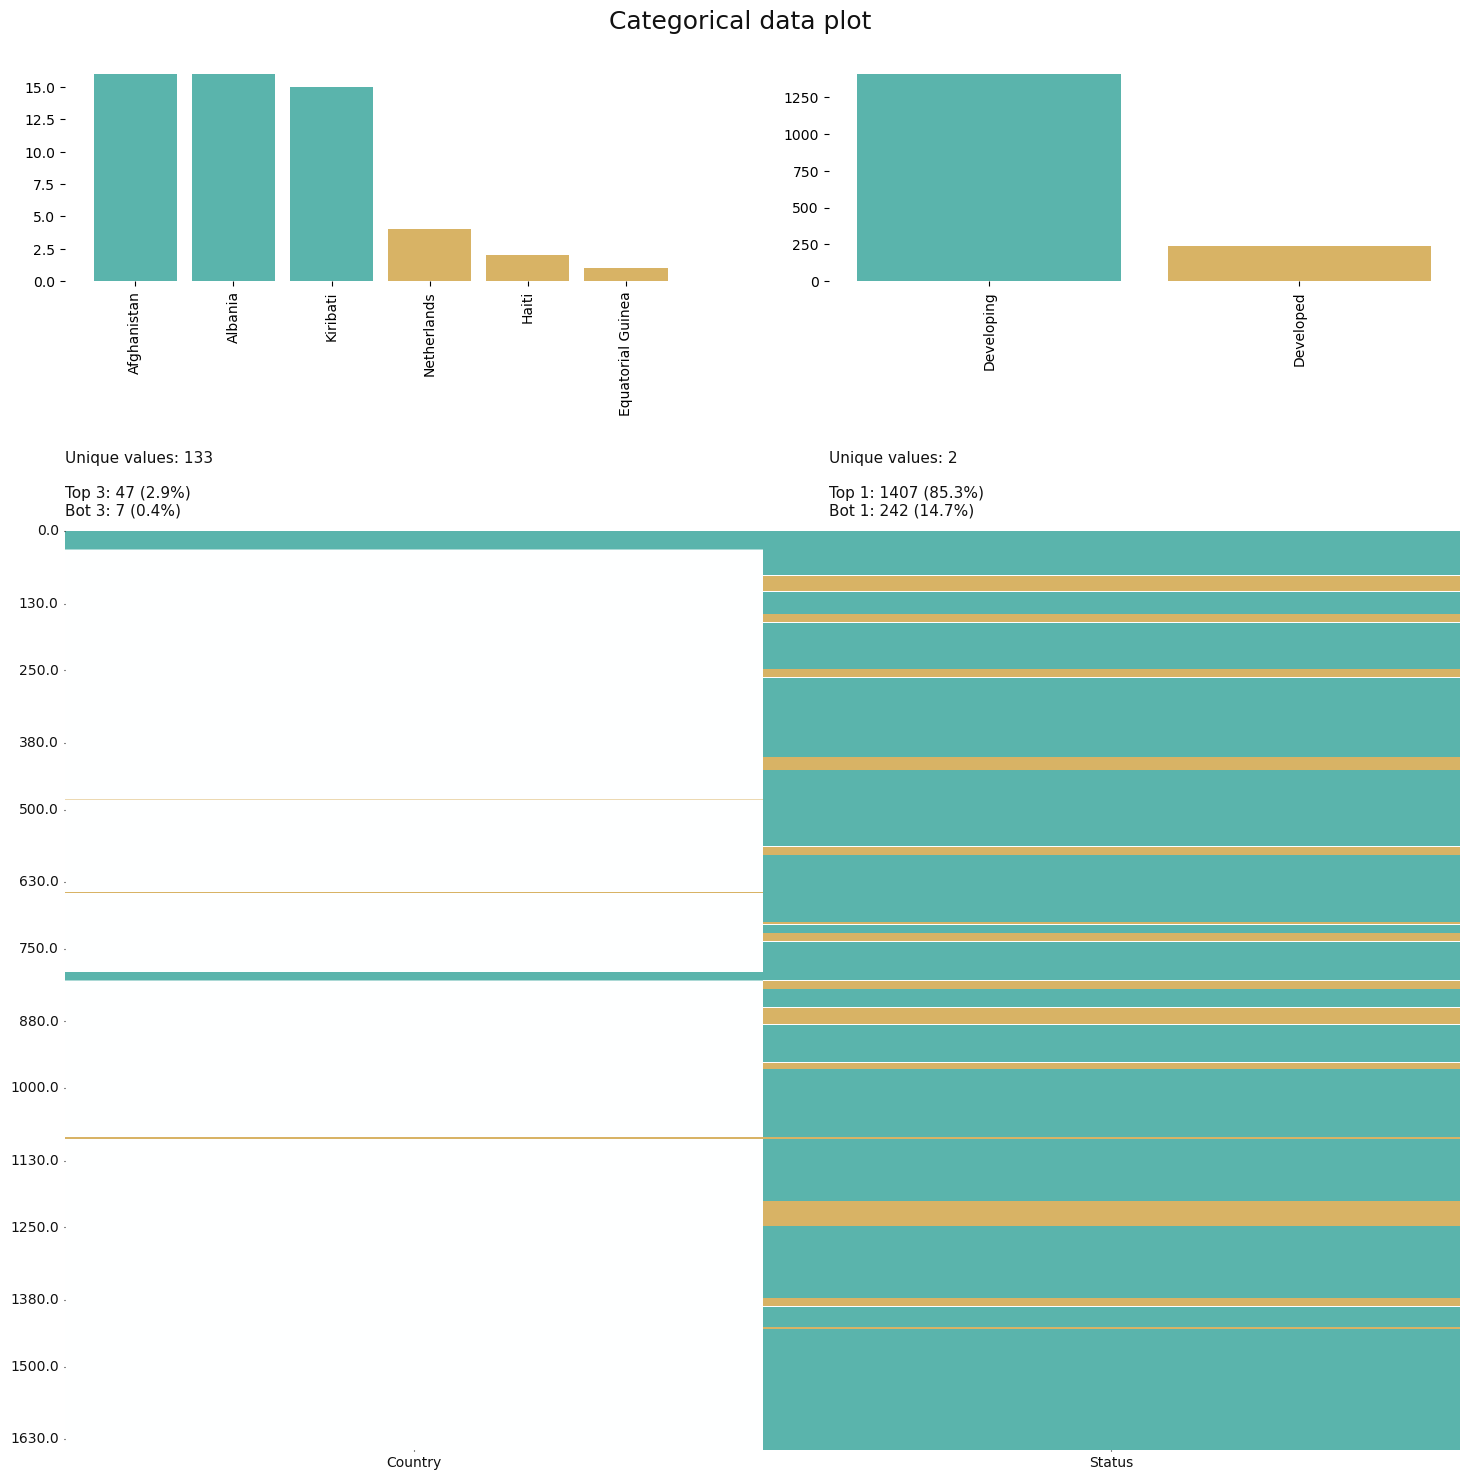

In [17]:
# Categorical Plot
klib.cat_plot(ndf);

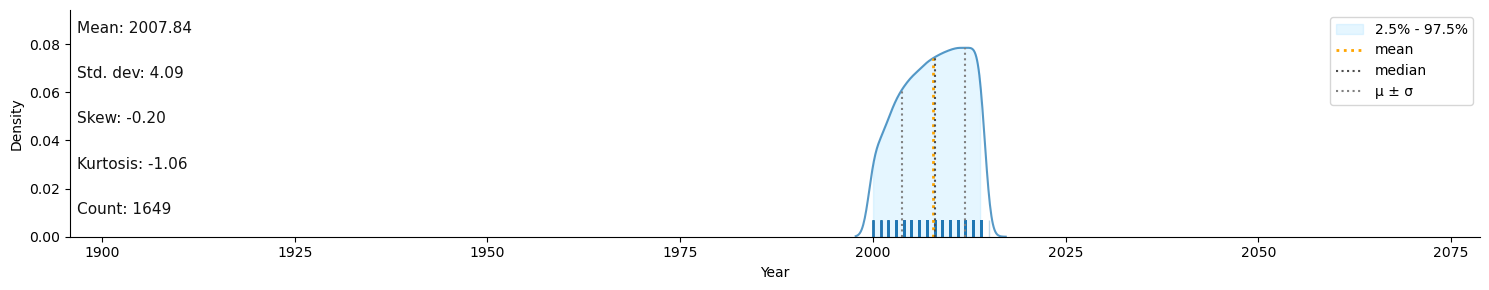

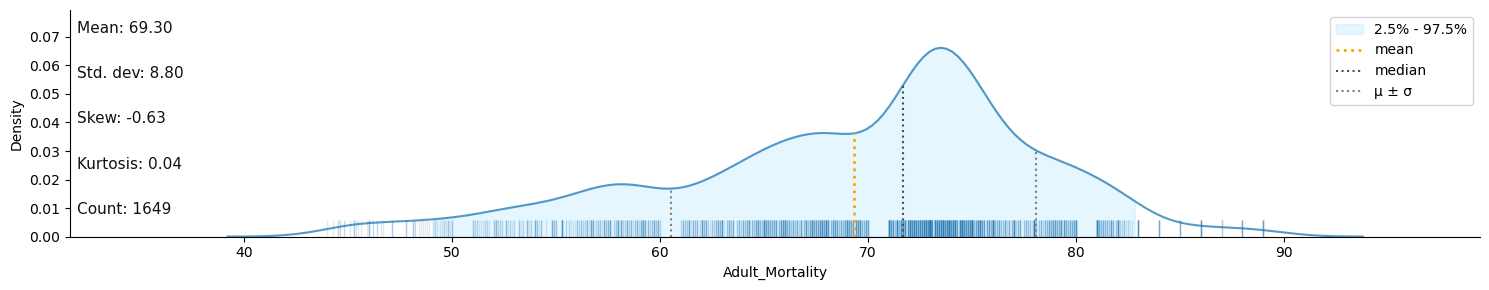

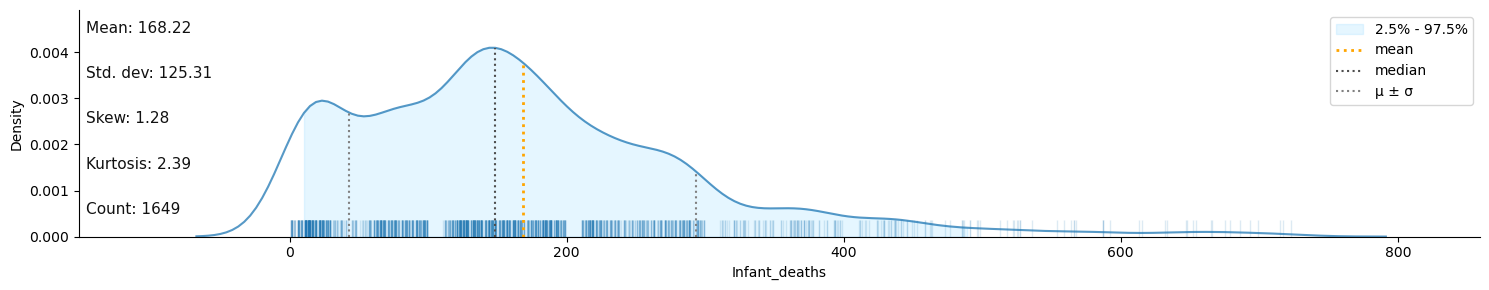

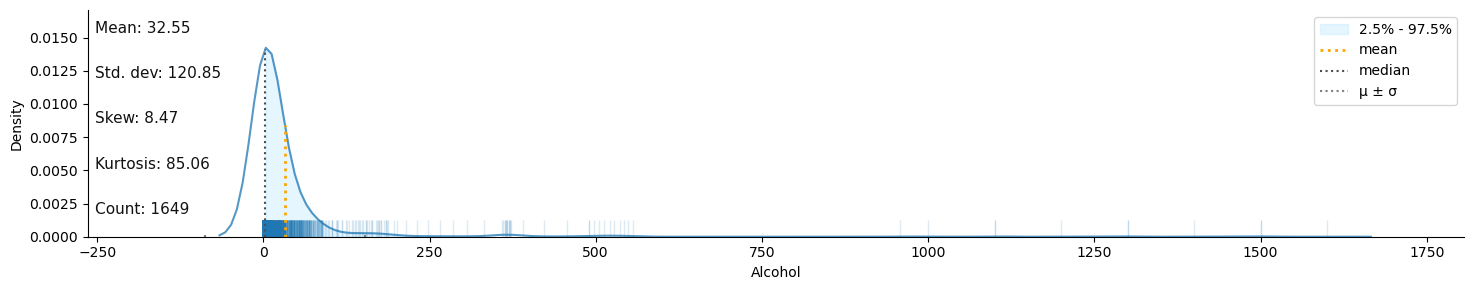

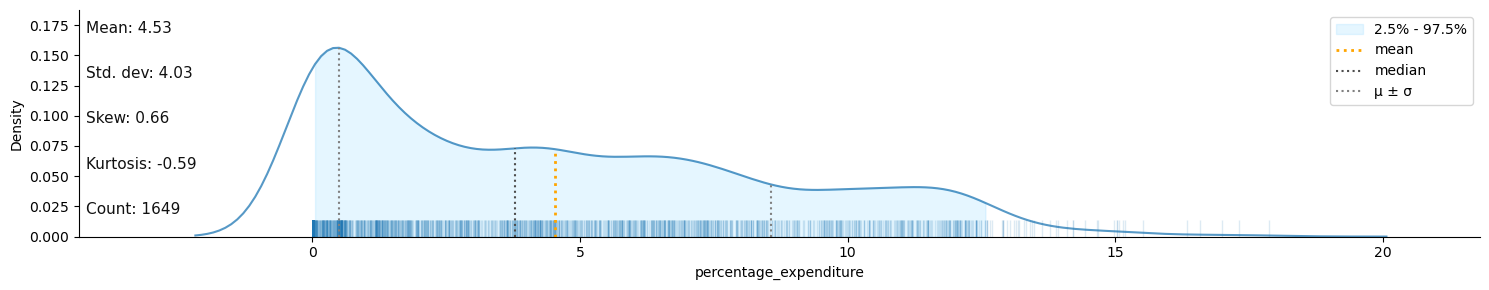

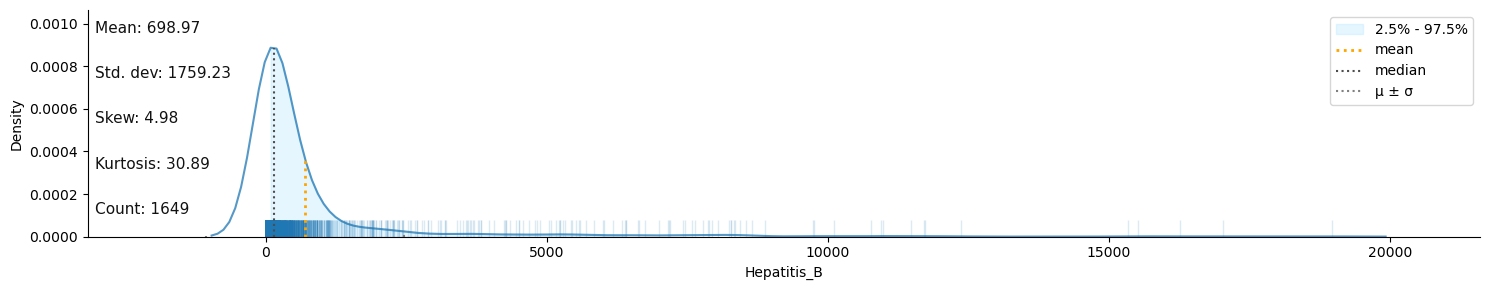

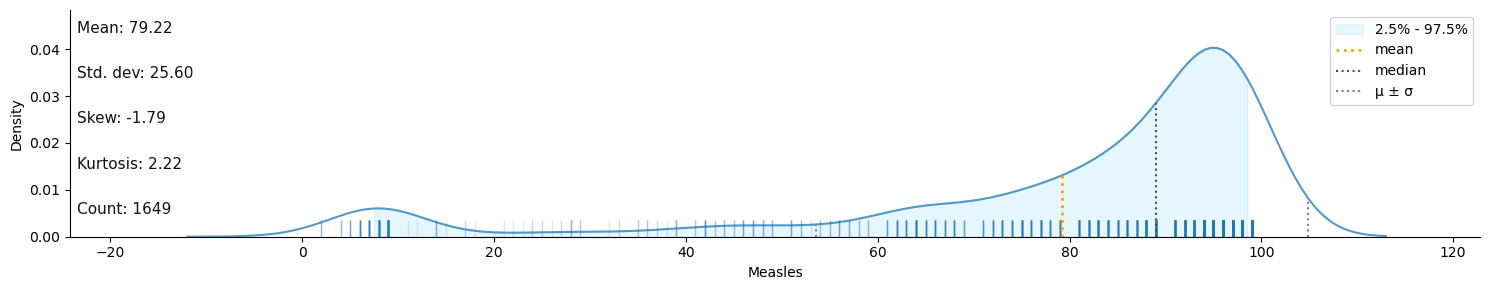

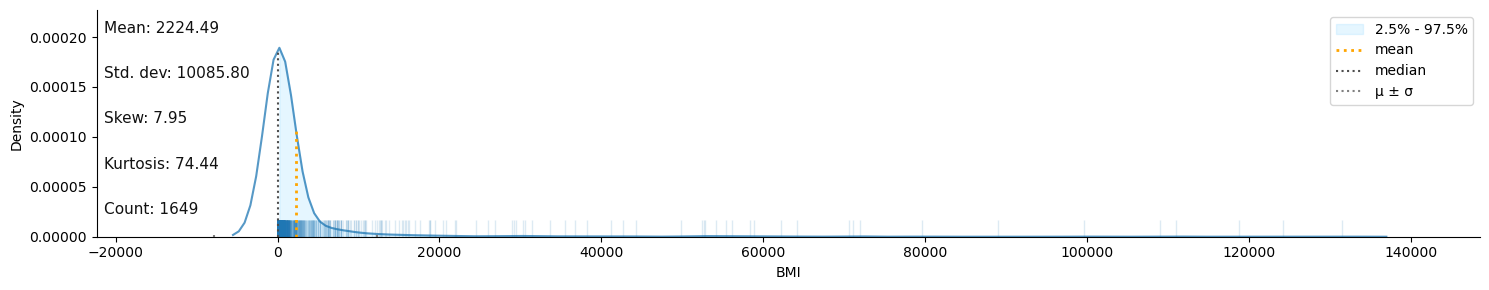

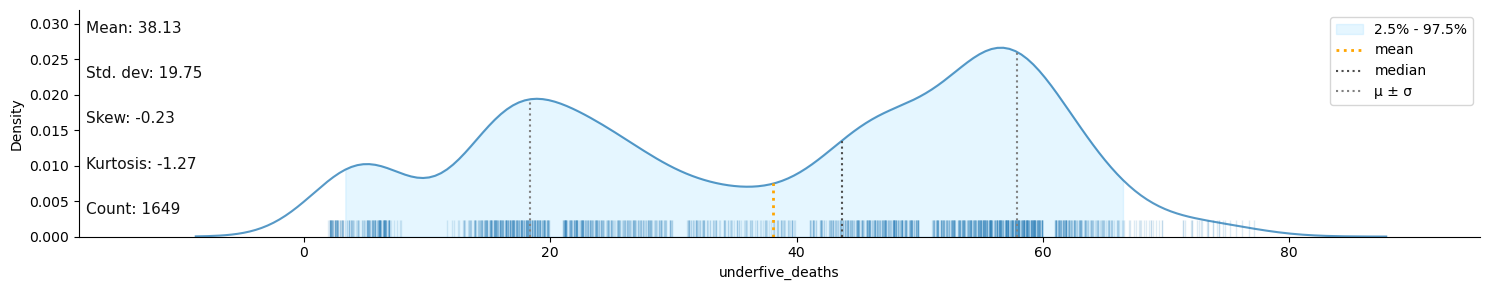

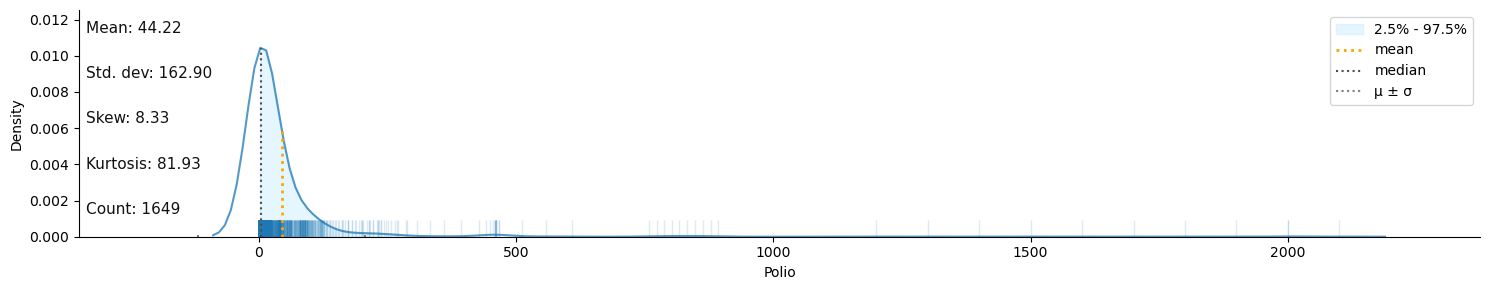

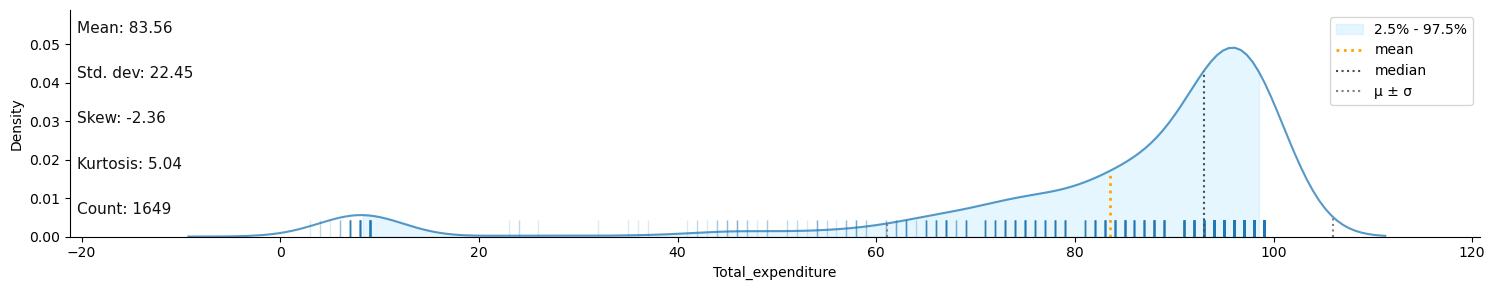

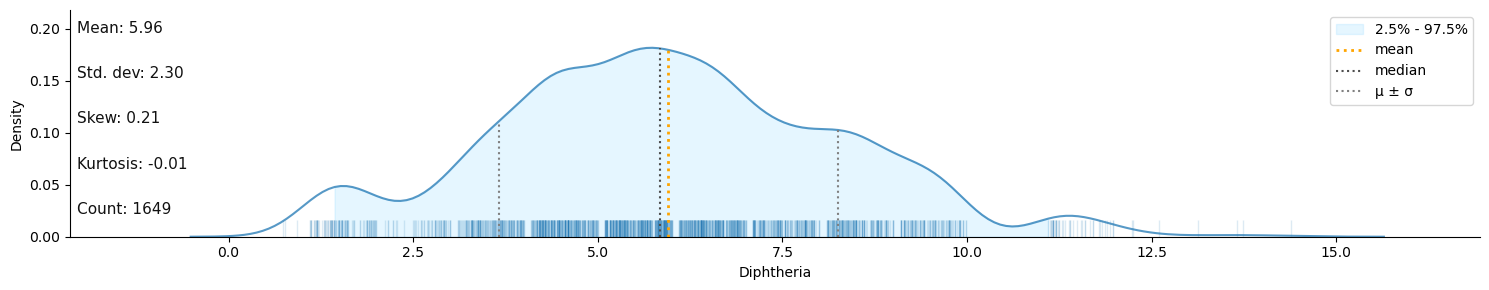

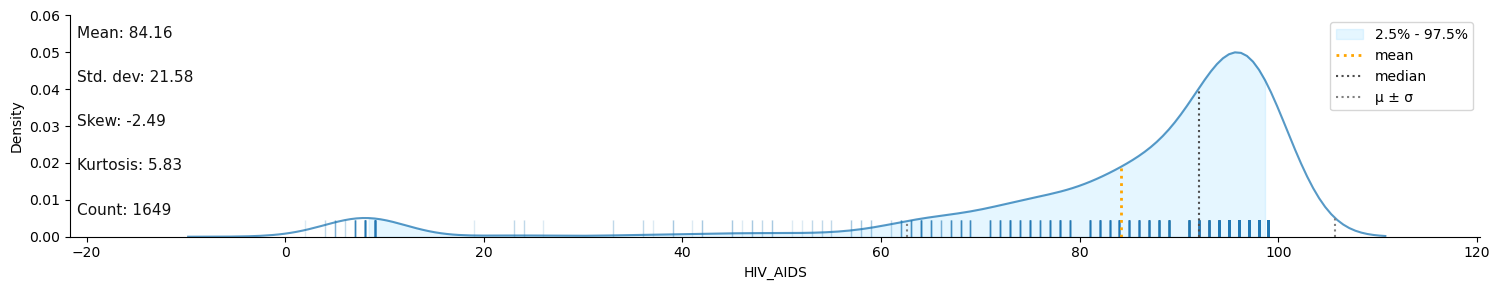

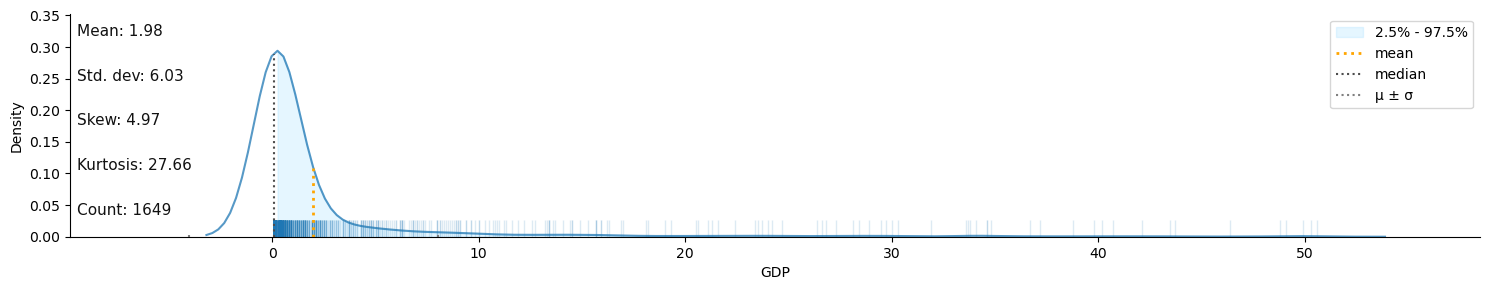

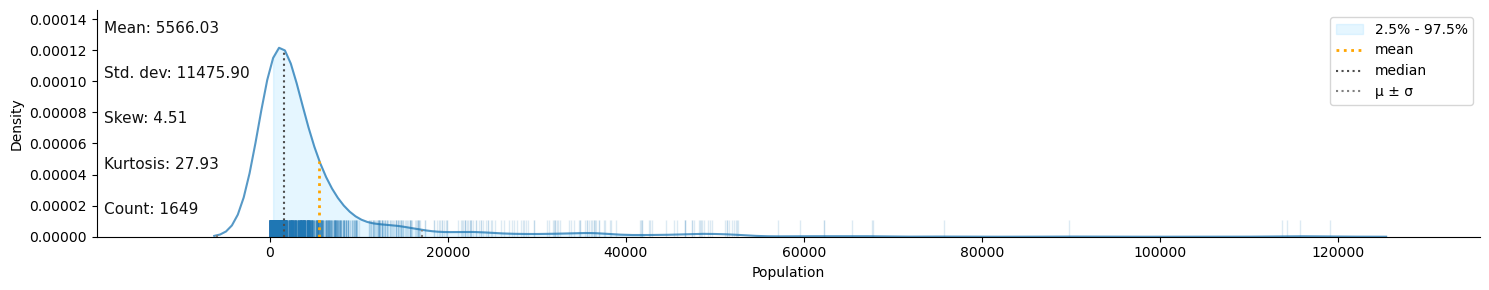

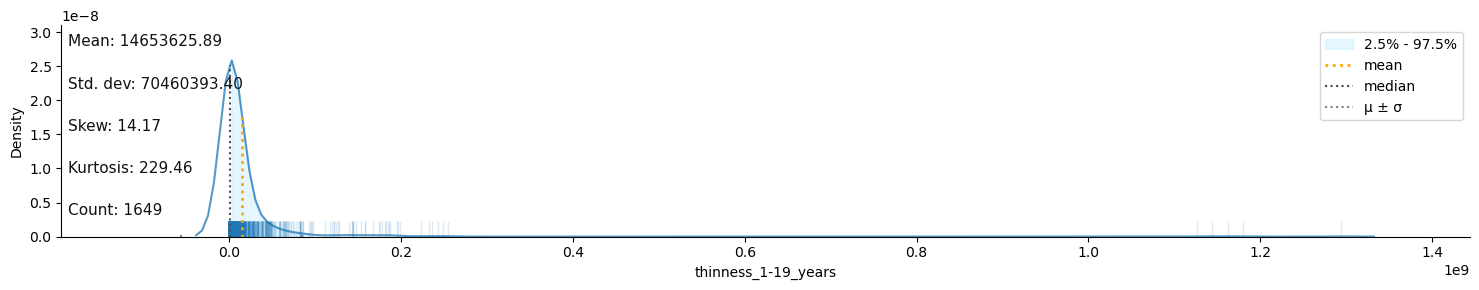

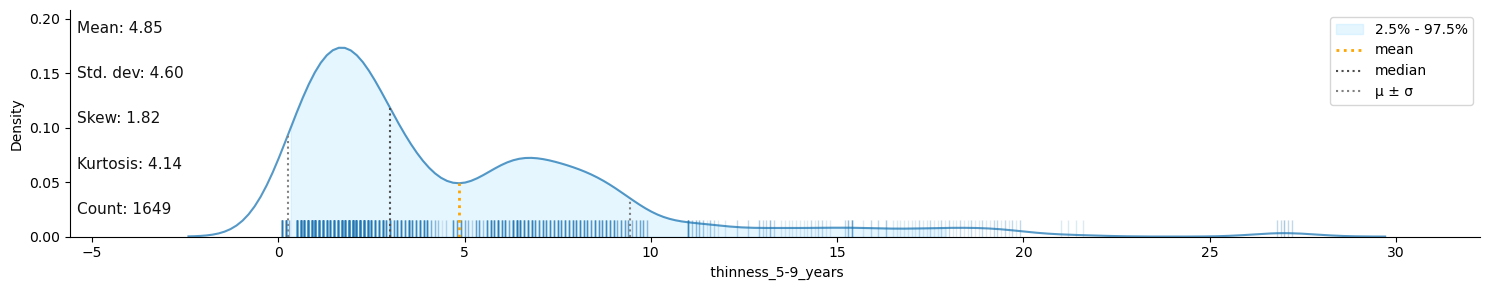

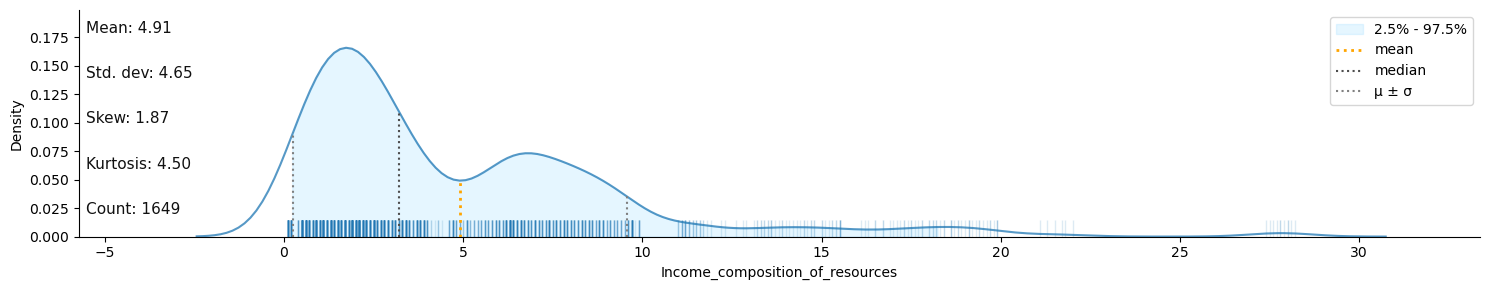

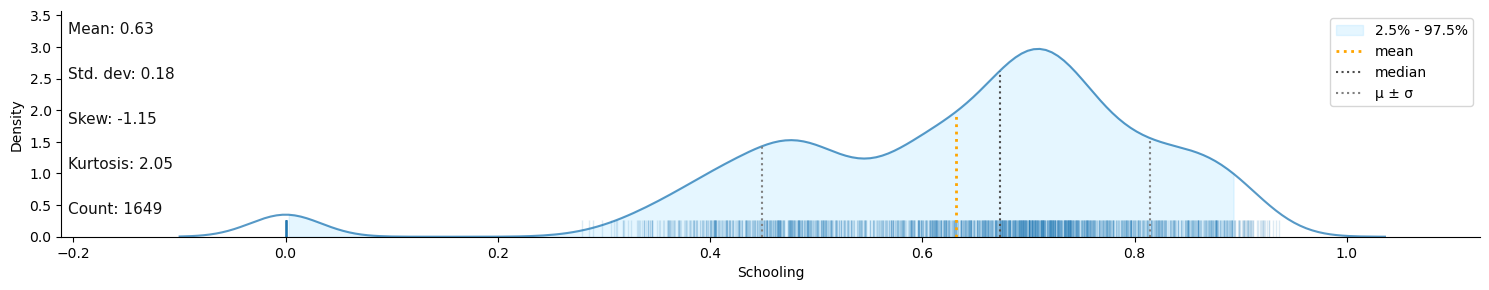

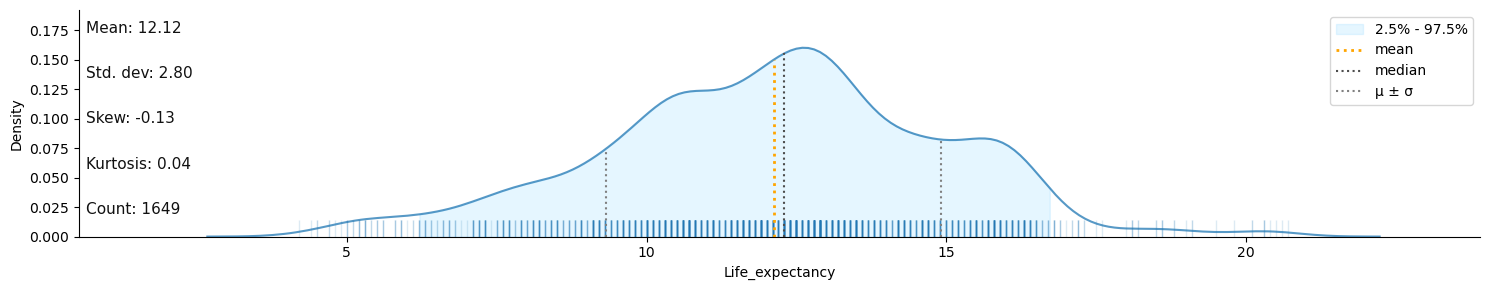

In [18]:
# Distribution Plot
klib.dist_plot(ndf,showall=True);

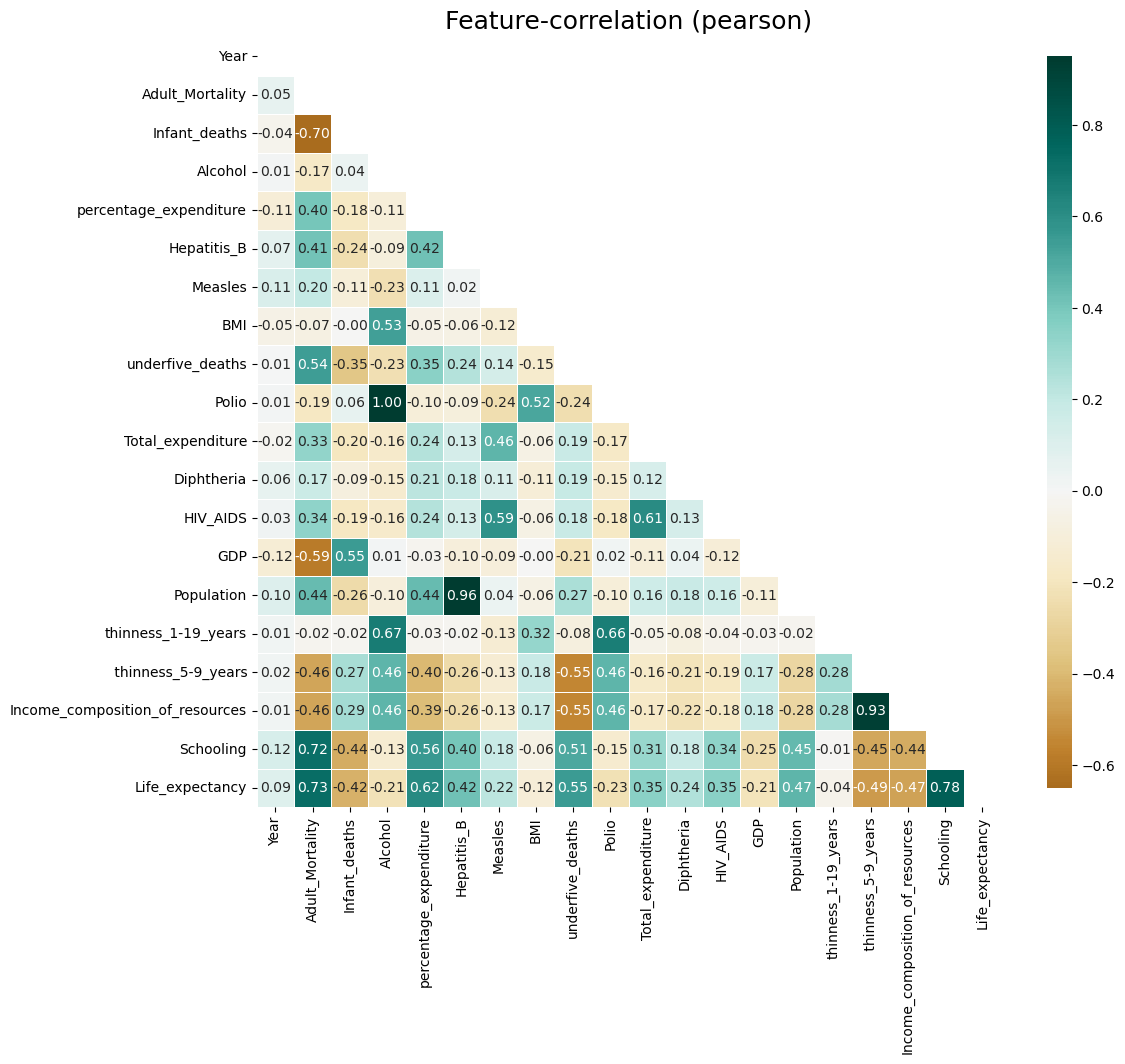

In [19]:
# HeatMap Correlation Plot
klib.corr_plot(ndf,annot=True);

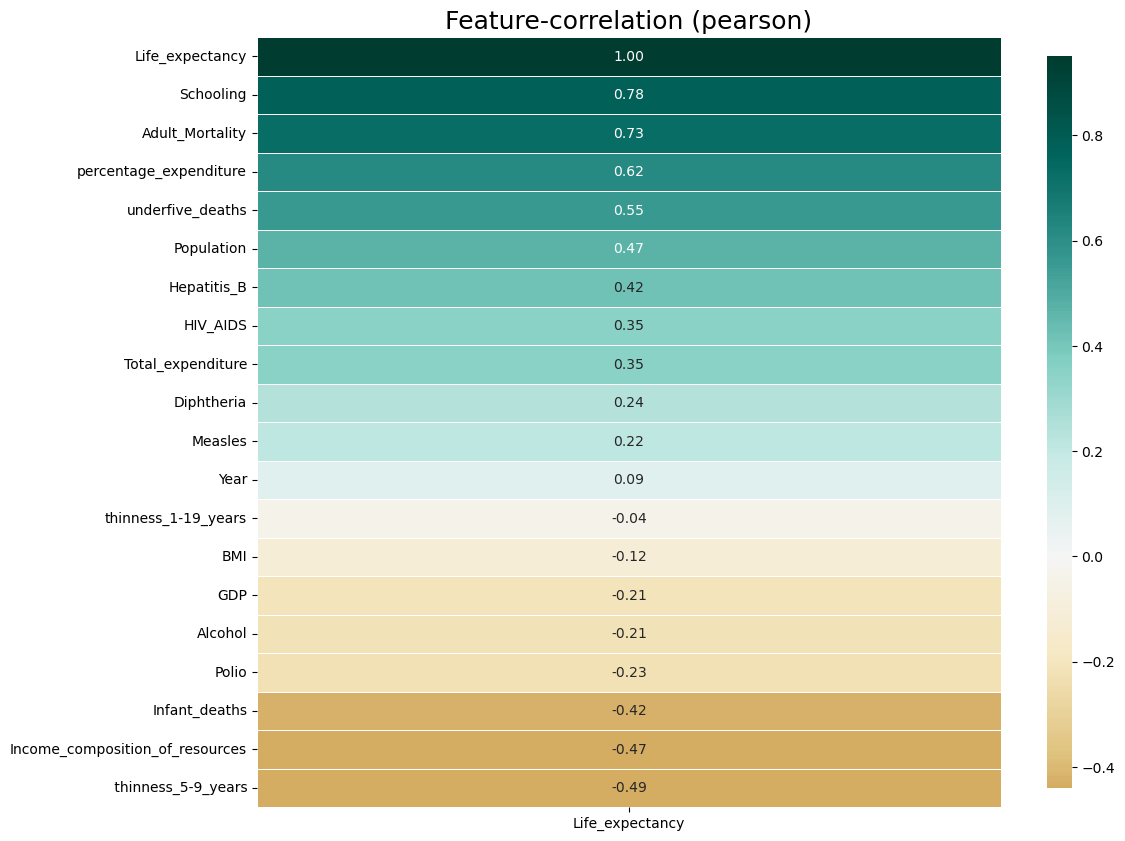

In [20]:
# HeatMap Correlation Plot
klib.corr_plot(ndf,target=ndf.Life_expectancy);

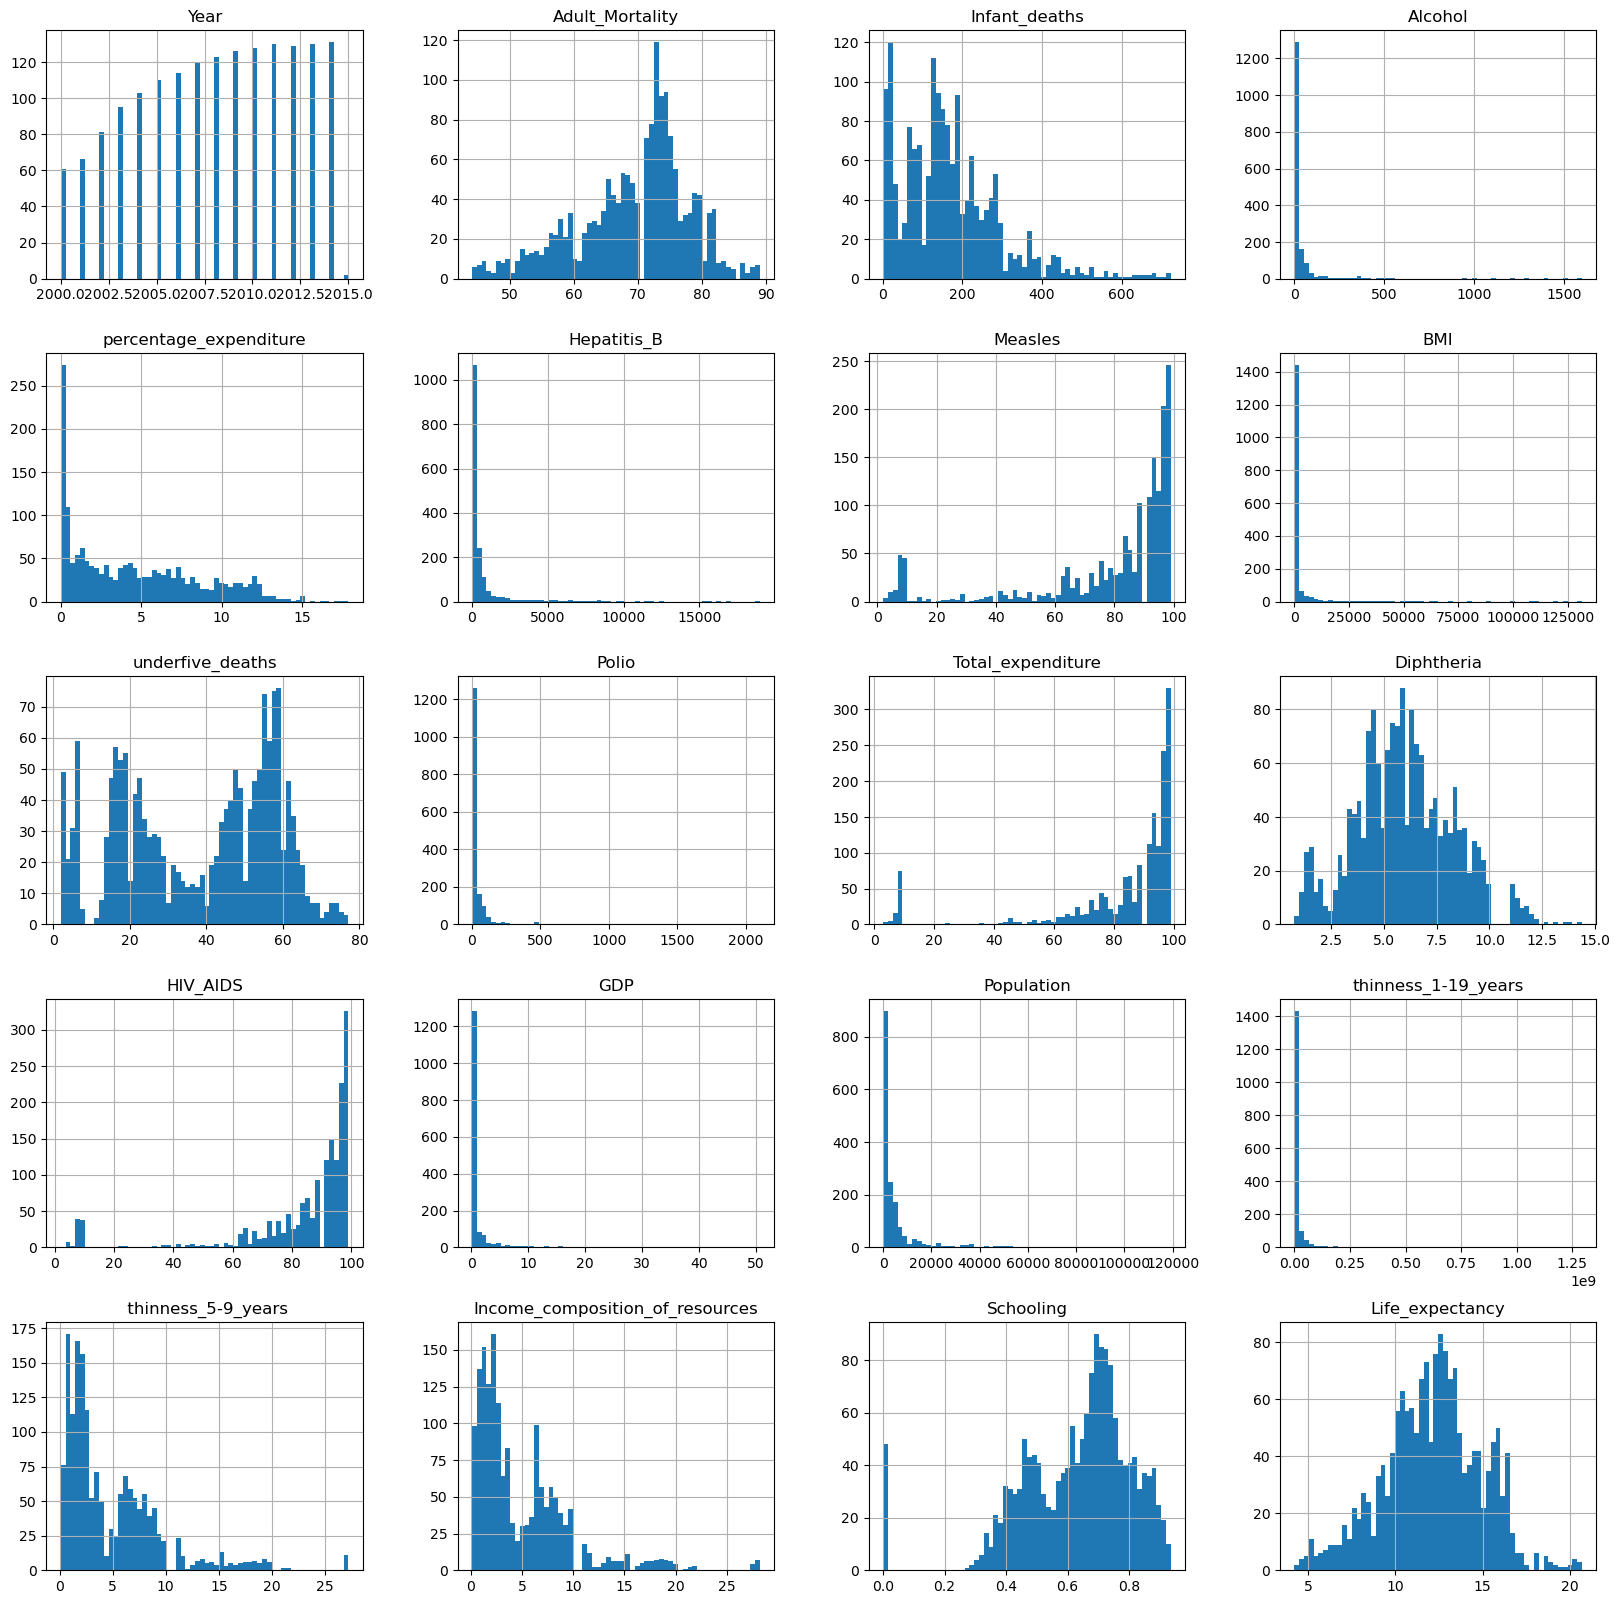

In [21]:
ndf.hist(figsize=(20,20), bins=60);

In [22]:
data = ndf.drop(['Country','Year'],axis=1)
data

Status  Adult_Mortality  Infant_deaths  Alcohol  \
0     Developing             65.0          263.0       62   
1     Developing             59.9          271.0       64   
2     Developing             59.9          268.0       66   
3     Developing             59.5          272.0       69   
4     Developing             59.2          275.0       71   
...          ...              ...            ...      ...   
2933  Developing             44.3          723.0       27   
2934  Developing             44.5          715.0       26   
2935  Developing             44.8           73.0       25   
2936  Developing             45.3          686.0       25   
2937  Developing             46.0          665.0       24   

      percentage_expenditure  Hepatitis_B  Measles   BMI  underfive_deaths  \
0                       0.01    71.279624     65.0  1154              19.1   
1                       0.01    73.523582     62.0   492              18.6   
2                       0.01    73.219243     64.0   430              18.1   
3                       0.01    78.184215     67.0  2787              17.6   
4                       0.01     7.097109     68.0  3013              17.2   
...                      ...          ...      ...   ...               ...   
2933                    4.36     0.000000     68.0    31              27.1   
2934                    4.06     0.000000      7.0   998              26.7   
2935                    4.43     0.000000     73.0   304              26.3   
2936                    1.72     0.000000     76.0   529              25.9   
2937                    1.68     0.000000     79.0  1483              25.5   

      Polio  Total_expenditure  Diphtheria  HIV_AIDS   GDP  Population  \
0        83                6.0        8.16      65.0   0.1  584.259210   
1        86               58.0        8.18      62.0   0.1  612.696514   
2        89               62.0        8.13      64.0   0.1  631.744976   
3        93               67.0        8.52      67.0   0.1  669.959000   
4        97               68.0        7.87      68.0   0.1   63.537231   
...     ...                ...         ...       ...   ...         ...   
2933     42               67.0        7.13      65.0  33.6  454.366654   
2934     41                7.0        6.52      68.0  36.7  453.351155   
2935     40               73.0        6.53      71.0  39.8   57.348340   
2936     39               76.0        6.16      75.0  42.1  548.587312   
2937     39               78.0        7.10      78.0  43.5  547.358878   

      thinness_1-19_years   thinness_5-9_years  \
0              33736494.0                 17.2   
1                327582.0                 17.5   
2              31731688.0                 17.7   
3               3696958.0                 17.9   
4               2978599.0                 18.2   
...                   ...                  ...   
2933           12777511.0                  9.4   
2934           12633897.0                  9.8   
2935             125525.0                  1.2   
2936           12366165.0                  1.6   
2937           12222251.0                 11.0   

      Income_composition_of_resources  Schooling  Life_expectancy  
0                                17.3      0.479             10.1  
1                                17.5      0.476             10.0  
2                                17.7      0.470              9.9  
3                                18.0      0.463              9.8  
4                                18.2      0.454              9.5  
...                               ...        ...              ...  
2933                              9.4      0.407              9.2  
2934                              9.9      0.418              9.5  
2935                              1.3      0.427             10.0  
2936                              1.7      0.427              9.8  
2937                             11.2      0.434              9.8  

[1649 rows x 20 columns]

In [23]:
data['Status'] = data['Status'].map({'Developing': 1, 'Developed': 0})

In [24]:
data.head(10)

Status  Adult_Mortality  Infant_deaths  Alcohol  percentage_expenditure  \
0       1             65.0          263.0       62                    0.01   
1       1             59.9          271.0       64                    0.01   
2       1             59.9          268.0       66                    0.01   
3       1             59.5          272.0       69                    0.01   
4       1             59.2          275.0       71                    0.01   
5       1             58.8          279.0       74                    0.01   
6       1             58.6          281.0       77                    0.01   
7       1             58.1          287.0       80                    0.03   
8       1             57.5          295.0       82                    0.02   
9       1             57.3          295.0       84                    0.03   

   Hepatitis_B  Measles   BMI  underfive_deaths  Polio  Total_expenditure  \
0    71.279624     65.0  1154              19.1     83                6.0   
1    73.523582     62.0   492              18.6     86               58.0   
2    73.219243     64.0   430              18.1     89               62.0   
3    78.184215     67.0  2787              17.6     93               67.0   
4     7.097109     68.0  3013              17.2     97               68.0   
5    79.679367     66.0  1989              16.7    102               66.0   
6    56.762217     63.0  2861              16.2    106               63.0   
7    25.873925     64.0  1599              15.7    110               64.0   
8    10.910156     63.0  1141              15.2    113               63.0   
9    17.171518     64.0  1990              14.7    116               58.0   

   Diphtheria  HIV_AIDS  GDP  Population  thinness_1-19_years  \
0        8.16      65.0  0.1  584.259210           33736494.0   
1        8.18      62.0  0.1  612.696514             327582.0   
2        8.13      64.0  0.1  631.744976           31731688.0   
3        8.52      67.0  0.1  669.959000            3696958.0   
4        7.87      68.0  0.1   63.537231            2978599.0   
5        9.20      66.0  0.1  553.328940            2883167.0   
6        9.42      63.0  0.1  445.893298             284331.0   
7        8.33      64.0  0.1  373.361116            2729431.0   
8        6.73      63.0  0.1  369.835796           26616792.0   
9        7.43      58.0  0.1  272.563770            2589345.0   

    thinness_5-9_years  Income_composition_of_resources  Schooling  \
0                 17.2                             17.3      0.479   
1                 17.5                             17.5      0.476   
2                 17.7                             17.7      0.470   
3                 17.9                             18.0      0.463   
4                 18.2                             18.2      0.454   
5                 18.4                             18.4      0.448   
6                 18.6                             18.7      0.434   
7                 18.8                             18.9      0.433   
8                 19.0                             19.1      0.415   
9                 19.2                             19.3      0.405   

   Life_expectancy  
0             10.1  
1             10.0  
2              9.9  
3              9.8  
4              9.5  
5              9.2  
6              8.9  
7              8.7  
8              8.4  
9              8.1

In [25]:
# Cleaned Data
ndf.to_csv('CleanedData.csv')

In [26]:
# EDA Report
from dataprep.eda import create_report
create_report(ndf).show_browser()

  0%|                                                                                    | 0/4503 [00:00<?, ?i…

In [27]:
colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857']
def plot_boxplot(df, columns, title = 'Box plot of features'):
      
    df = df.copy()
    
    rows = math.ceil(len(columns)/2)
    
    fig, ax = plt.subplots(rows, 2, figsize = (14,14))
    
    for i, column in enumerate(columns):
        ax = plt.subplot(rows, 2, i+1)
        
        sns.boxplot(x = df[column], 
                    data = df, 
                    ax = ax, 
                    color = colors[0])
    
        ax.set_xlabel(column)
        ax.set_ylabel('')
    
    fig.suptitle(title, 
                 fontsize=24,
                 x = 0.56);
    
    fig.text(0.04, 0.5, 
             'Density', 
             va='center', 
             rotation='vertical', 
             fontsize=16)
    
    fig.tight_layout(rect=[0.05, 0.03, 1, 1])

In [28]:
# Removing Outlier in Dataset
#Class to replace outliers
class OutliersRemover(BaseEstimator, TransformerMixin):
    def __init__(self, baseline=1.5):
        self.baseline = baseline
        
    def fit(self, X, y=None):
        X = check_array(X, force_all_finite=False) #If non-array, transform into an array
        q1 = np.nanquantile(X, 0.25, axis=0) #First quartile
        q3 = np.nanquantile(X, 0.75, axis=0) #Third quartile
        IQR = q3 - q1
        self.lower_bound = q1 - (self.baseline * IQR)
        self.upper_bound = q3 + (self.baseline * IQR)
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X, y=None):
        check_is_fitted(self)
        X = check_array(X, force_all_finite=False)
        assert self.n_features_in_ == X.shape[1]
        X_transformed = X.copy()
        X_transformed = np.where(((X_transformed < self.lower_bound) | (X_transformed > self.upper_bound)),
                                 np.nan, 
                                 X_transformed)
        
        
        return X_transformed #Returns an array

In [29]:
nfeature = ['Adult_Mortality', 'Infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'underfive_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       ' thinness_5-9_years', 'Income_composition_of_resources', 'Schooling',
       'Life_expectancy']

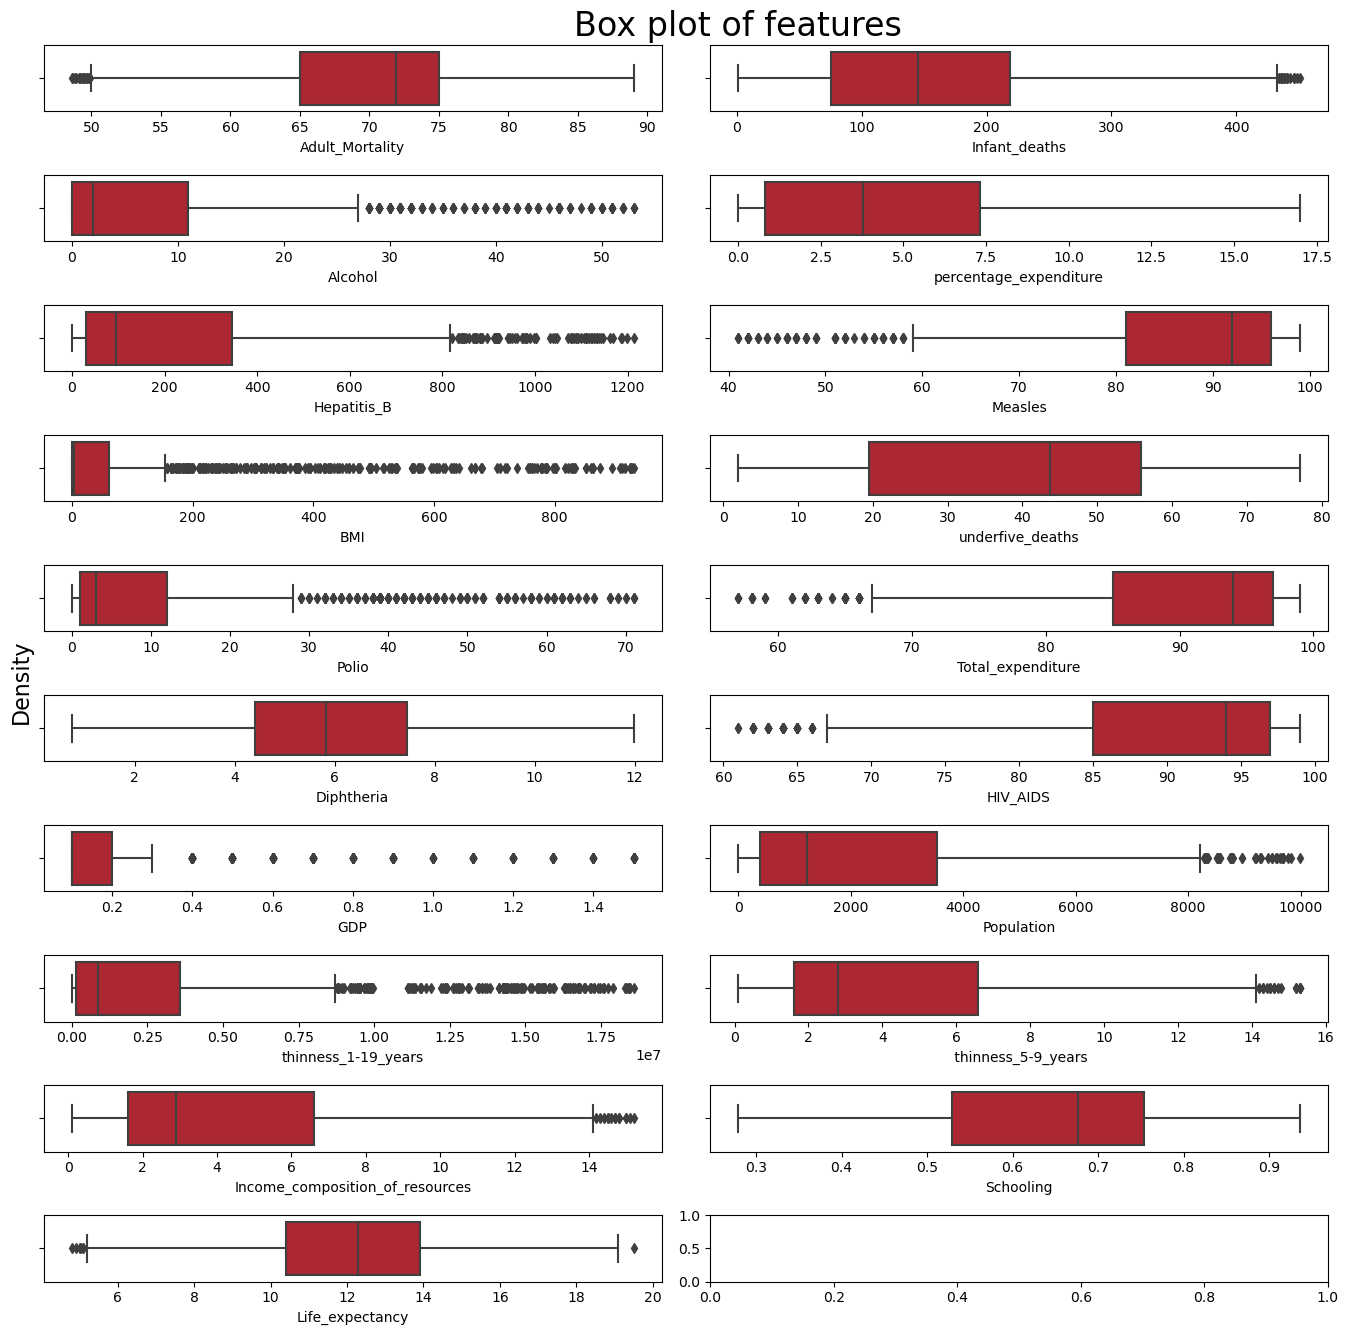

In [30]:
#Select the features
features = nfeature

#Create a copy of the Dataframe with the selected features
df_temp = data[features].copy()

#Create, fit and transform the class OutliersRemover()
remove_outliers = OutliersRemover()
df_temp_without_outliers = remove_outliers.fit_transform(df_temp)

#Transform array back to a DataFrame
df_temp_transformed = pd.DataFrame(data = df_temp_without_outliers, columns = features)

#Plot boxplot
plot_boxplot(df_temp_transformed, features)


In [31]:
data.columns

Index(['Status', 'Adult_Mortality', 'Infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'underfive_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       ' thinness_5-9_years', 'Income_composition_of_resources', 'Schooling',
       'Life_expectancy'],
      dtype='object')

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split Data set into Independent Features and Dependent Feature

X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
!pip install XGBoost
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

Defaulting to user installation because normal site-packages is not writeable


In [34]:
def CVFold(models):
    score = cross_val_score(model,X_train,y_train,cv=CV,scoring = 'r2')
    print("Baseline mean R-squared from K-fold CV of {} is {}".format(model, round(np.mean(score), 4)))

In [35]:
CV = KFold(n_splits=5, shuffle=True, random_state=23)

In [36]:
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), RandomForestRegressor()]
for model in models:
    CVFold(models)

Baseline mean R-squared from K-fold CV of LinearRegression() is 0.7406
Baseline mean R-squared from K-fold CV of Ridge() is 0.7398
Baseline mean R-squared from K-fold CV of Lasso() is -0.0076
Baseline mean R-squared from K-fold CV of DecisionTreeRegressor() is 0.8753
Baseline mean R-squared from K-fold CV of RandomForestRegressor() is 0.9334
Baseline mean R-squared from K-fold CV of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=

In [37]:
def TestXGBParams(**params):
    score = cross_val_score(XGBRegressor(**params, n_jobs=-1, random_state=23), X_train, y_train, cv= CV, scoring="r2")
    print("Mean R-squared from K-fold CV with {} is {}".format(params, round(np.mean(score), 4)))

In [38]:
estimators = [1,2,4,8,16,32,64,120,125,127,130,133,140,150,200,256]
for n in estimators:
    TestXGBParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 1} is -8.0938
Mean R-squared from K-fold CV with {'n_estimators': 2} is -3.5789
Mean R-squared from K-fold CV with {'n_estimators': 4} is -0.2335
Mean R-squared from K-fold CV with {'n_estimators': 8} is 0.8289
Mean R-squared from K-fold CV with {'n_estimators': 16} is 0.9268
Mean R-squared from K-fold CV with {'n_estimators': 32} is 0.9373
Mean R-squared from K-fold CV with {'n_estimators': 64} is 0.9408
Mean R-squared from K-fold CV with {'n_estimators': 120} is 0.9417
Mean R-squared from K-fold CV with {'n_estimators': 125} is 0.9417
Mean R-squared from K-fold CV with {'n_estimators': 127} is 0.9417
Mean R-squared from K-fold CV with {'n_estimators': 130} is 0.9417
Mean R-squared from K-fold CV with {'n_estimators': 133} is 0.9417
Mean R-squared from K-fold CV with {'n_estimators': 140} is 0.9417
Mean R-squared from K-fold CV with {'n_estimators': 150} is 0.9418
Mean R-squared from K-fold CV with {'n_estimators': 200} is 0.9418
Mea

In [39]:
depths = [1, 2, 4,6,8,10,12,14,16,20,25]
for n in depths:
    TestXGBParams(n_estimators = 120, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 1} is 0.8522
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 2} is 0.9194
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 4} is 0.9428
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 6} is 0.9417
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 8} is 0.9389
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 10} is 0.9356
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 12} is 0.9347
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 14} is 0.9351
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 16} is 0.9352
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 20} is 0.9348
Mean R-squared from K-fold CV with {'n_estimators': 120, 'max_depth': 25} is 0.9344


In [40]:
rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for n in rates:
    TestXGBParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.1} is 0.939
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.2} is 0.9471
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.9431
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.4} is 0.9399
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.5} is 0.9374
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.6} is 0.9345
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.7} is 0.926
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.8} is 0.9119
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.9} is 0.891
Mean R-squared from K-fold CV with {'n_estimators': 128, '

In [41]:
model = XGBRegressor(n_estimators = 256, max_depth = 4, learning_rate = .2, n_jobs=-1, random_state = 23)

In [42]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=256, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=23, ...)

In [43]:
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test,y_pred)

print('Our Optimized XGBRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized XGBRegressor got the following scores on the test set:
R-squared: 0.9588047959249549
MSE: 0.319458236646128
RMSE: 0.5652063664239177
MAE: 0.4205030356513129


In [44]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

Feature  Importance
18                        Schooling    0.693497
9                             Polio    0.042487
16               thinness_5-9_years    0.037764
17  Income_composition_of_resources    0.028236
4            percentage_expenditure    0.026940
8                  underfive_deaths    0.026772
13                              GDP    0.025422
3                           Alcohol    0.024551
14                       Population    0.013704
11                       Diphtheria    0.010458
12                         HIV_AIDS    0.010303
6                           Measles    0.009926
7                               BMI    0.008374
1                   Adult_Mortality    0.008315
10                Total_expenditure    0.008051
2                     Infant_deaths    0.007676
0                            Status    0.007060
5                       Hepatitis_B    0.005653
15              thinness_1-19_years    0.004812

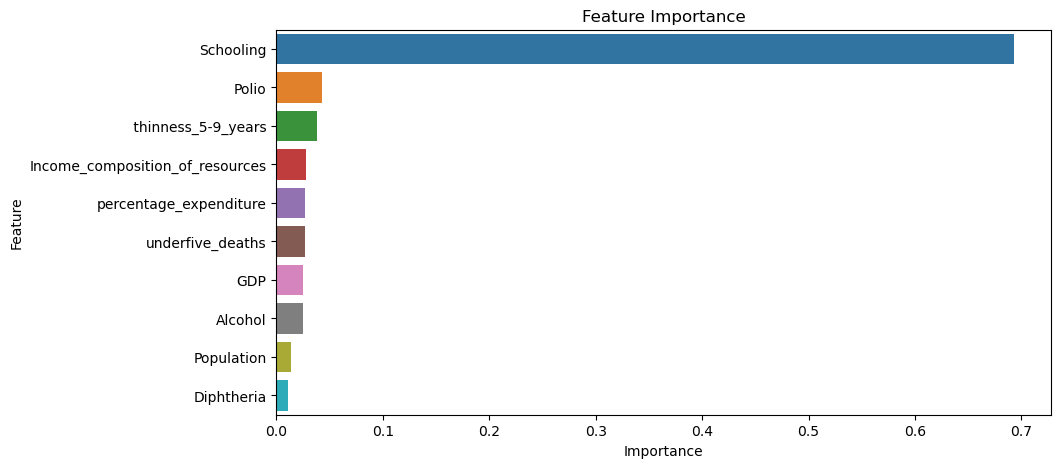

In [45]:
plt.figure(figsize=(10,5))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');

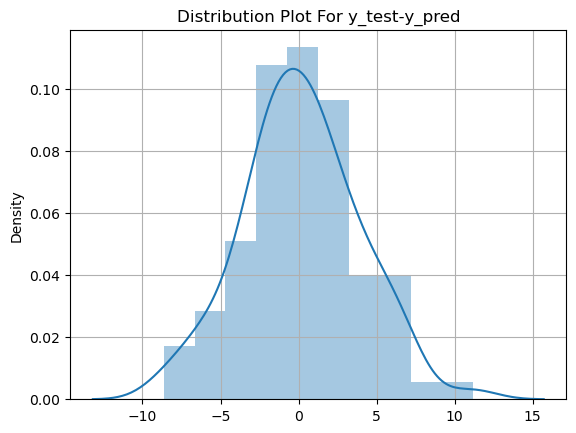

In [46]:
# Converting array into DataFrame
y_pred = pd.DataFrame(y_pred,columns = y_test.columns) 
sns.distplot(y_test-y_pred)
plt.title('Distribution Plot For y_test-y_pred')
plt.grid()
plt.show()

### Evaluation of Results using Random Forest Technique

In [47]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 256, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=256, random_state=0)

In [48]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.9436610254744653

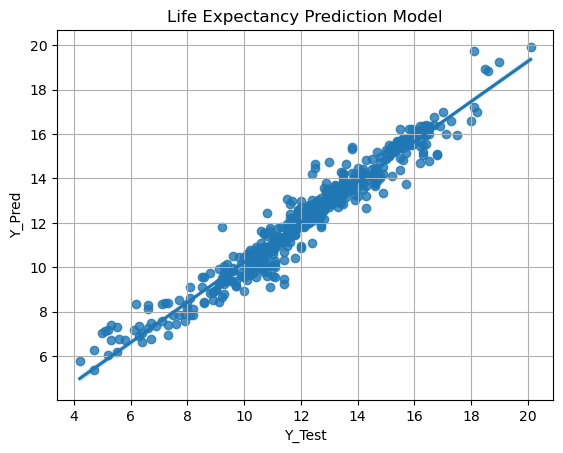

In [49]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('y_test')
plt.title('Life Expectancy Prediction Model')
plt.xlabel('Y_Test')
plt.ylabel('Y_Pred')
plt.grid()
plt.show()